<a href="https://colab.research.google.com/github/Bhupesh1111/yes_bank_EDA_Project/blob/main/My_Personal_colab_of_Capstone_Project_Regression_Analysis_Yes_Bank_Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Capstone Project - Yes Bank Stock Closing Price Prediction**

## **(Supervised - Regression)**

### **Project Type**    - Regression
### **Team Member**   - Bhupesh Rajput

147272-yes-bank-share-price-reuters.avif

#**Project summary**


#Yes Bank is a well-known financial institution in the Indian domain. Since 2018, it has consistently made headlines due to fluctuations in its stock prices attributed to events involving the company's founder, Rana Kapoor. Given this context, there is a significant interest in assessing how such occurrences impact the bank's stock prices and whether predictive models, including time series methods, can effectively address such situations.

#The dataset at hand encompasses monthly stock price records of Yes Bank since its inception. It covers a range of metrics, including monthly closing, opening, highest, and lowest stock prices. The primary aim of this project is to construct models capable of predicting the closing price of the bank's stock for a given month.

#This project carries a pivotal significance, as accurately predicting Yes Bank's stock prices is a crucial task for a multitude of stakeholders, investors, and market participants. Yes Bank's prominence in the private sector banking industry in India has been coupled with challenges like high levels of non-performing assets and involvement in fraudulent activities. These challenges have prompted regulatory intervention by the Reserve Bank of India, rendering the prediction of Yes Bank's stock prices intricate and uncertain.

#To address this intricate challenge, the project harnesses a comprehensive dataset spanning from the inception of the bank. It aims to develop predictive models that adeptly capture the nuanced dynamics and trends in Yes Bank's stock prices, while accounting for the unpredictable events and market turbulence tied to the bank's performance.

#The project methodology entails the deployment of a diverse array of modeling techniques. The objective is to rigorously evaluate the performance of these models in accurately forecasting the closing price of Yes Bank's stock. Furthermore, the efficacy of the models lies in their capacity to incorporate the impact of significant events, such as instances of fraud involving the bank's founders or regulatory interventions by the Reserve Bank of India.

#By successfully accomplishing the prediction of Yes Bank's stock closing prices, this project stands to provide invaluable insights. These insights can significantly aid stakeholders in making well-informed decisions related to their investments in the bank. The project's broader purpose is to navigate the intricate landscape of Yes Bank's stock prices, unravel the complexities inherent in its financial performance, and ultimately empower decision-makers with the tools for sound judgment

#**Data Science Problem Statement**
---
#Perform regression analysis using multiple models to predict the closing price of the stock and compare the evaluation metrics for all of them to find the best model.



# **1. Know Your Data**

##**Importing Libraries**

In [ ]:
# importing the required libraries

import warnings    # do not disturb mode
warnings.filterwarnings('ignore')


import numpy as np   # numerical computations
import pandas as pd  # Data Manupulation

import matplotlib.pyplot as plt  # visualize with plots
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go

import scipy.stats as stats   # statistics

from datetime import datetime   # to convert to date

from sklearn.model_selection import train_test_split   # split train and test data

from sklearn.compose import ColumnTransformer #  transformation

from sklearn.preprocessing import StandardScaler,MinMaxScaler # scale the data

from sklearn.preprocessing import FunctionTransformer,PowerTransformer

from sklearn.preprocessing import PolynomialFeatures  #Higher-Dimensional

from sklearn.linear_model import LinearRegression,Ridge,ElasticNet,Lasso # regression model

from sklearn.model_selection import GridSearchCV, cross_val_score # hyperparameters tunning

from sklearn.pipeline import Pipeline  # creating pipeline
from sklearn.pipeline import make_pipeline  # make pipeline

from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score,accuracy_score # import required metrics
#from sklearn.model_selection import cross_val_score


## **Dataset Loading**

In [ ]:
# Mounting Drive
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [ ]:
# Defining file path
file_path =('/content/drive/MyDrive/AlmaBetter/Capstone/Regression on Yes Bank Stock Closing Price Prediction/data_YesBank_StockPrices.csv')
df=pd.read_csv(file_path)

##**Dataset FirstView**

In [ ]:
# Dataset First Look
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [ ]:
# Dataset last five row look
df.tail()

,Date,Open,High,Low,Close
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42
184,Nov-20,12.41,14.90,12.21,14.67


## **Dataset Rows and Columns Count**

In [ ]:
# Dataset Rows & Columns count
print(f'There are total {df.shape[0]} rows and {df.shape[1]} columns.')

There are total 185 rows and 5 columns.


## **Dataset Information**

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


## **Duplicate Values**

In [ ]:
# Dataset Duplicate Value Count
No_of_duplicate_rows=df[df.duplicated()].shape[0]
print(f'we hve total no {No_of_duplicate_rows} duplicate rows.')

we hve total no 0 duplicate rows.


## **Missing Values/ Null Values**

In [ ]:
# Missing Values/Null Values Count
df.isna().sum().sort_values(ascending=False).reset_index().rename(columns = {'index':'columns',0:'null values'})

,columns,null values
0,Date,0
1,Open,0
2,High,0
3,Low,0
4,Close,0


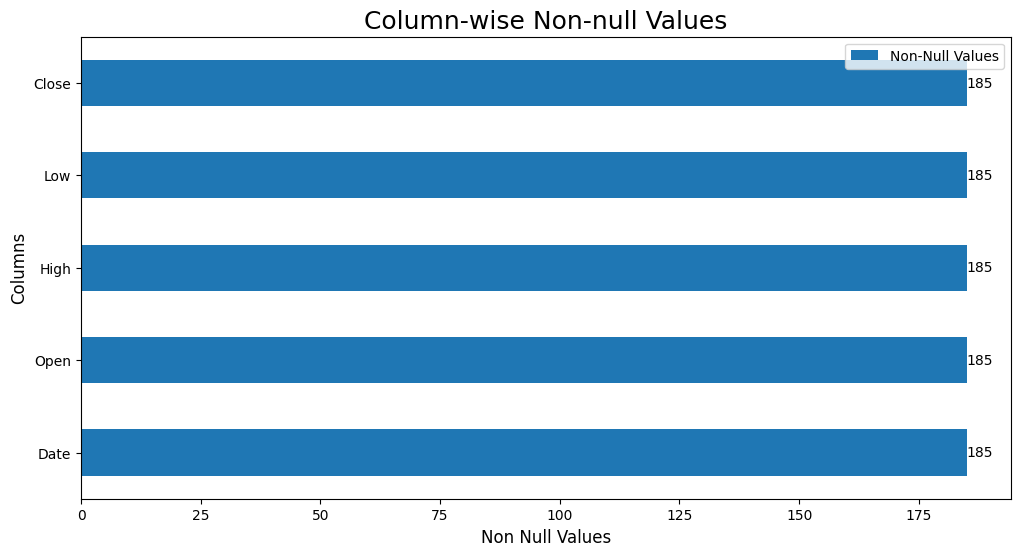

In [ ]:
# Visualization of Non-null Values

non_null_values = df.notnull().sum().reset_index().rename(columns = {'index' : 'columns', 0 : "Non-Null Values"})

ax = non_null_values.plot(kind = 'barh', x = 'columns', figsize=(12,6))
ax.bar_label(ax.containers[0])
plt.ylabel('Columns', {'fontsize': 12, 'fontweight': 15})
plt.xlabel("Non Null Values", {'fontsize': 12, 'fontweight': 15})
plt.title('Column-wise Non-null Values',{'fontsize': 18, 'fontweight': 20})
plt.show()

## **What did you know about your dataset?**

* We have no null values.
* Date column is of 'object' datatype we have to convert it to 'datetime'.
* Data type of Open, High, Low, Close columns are 'float64' we have to convert it into 'integer'.
* We have no duplicate values which makes the dataset easier to work with.

# **2. Understanding Your Variables**

## **Dataset Columns and Description**

In [ ]:
# Dataset Columns
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [ ]:
# Dataset Describe
df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


## **Unique values**

In [ ]:
# Check Unique Values for each variable.
def unique_values(df):
    unique_vals = []
    for col in df.columns:
        unique_vals.append(df[col].unique())

    return unique_vals

In [ ]:
unique_values(df)

[array(['Jul-05', 'Aug-05', 'Sep-05', 'Oct-05', 'Nov-05', 'Dec-05',
        'Jan-06', 'Feb-06', 'Mar-06', 'Apr-06', 'May-06', 'Jun-06',
        'Jul-06', 'Aug-06', 'Sep-06', 'Oct-06', 'Nov-06', 'Dec-06',
        'Jan-07', 'Feb-07', 'Mar-07', 'Apr-07', 'May-07', 'Jun-07',
        'Jul-07', 'Aug-07', 'Sep-07', 'Oct-07', 'Nov-07', 'Dec-07',
        'Jan-08', 'Feb-08', 'Mar-08', 'Apr-08', 'May-08', 'Jun-08',
        'Jul-08', 'Aug-08', 'Sep-08', 'Oct-08', 'Nov-08', 'Dec-08',
        'Jan-09', 'Feb-09', 'Mar-09', 'Apr-09', 'May-09', 'Jun-09',
        'Jul-09', 'Aug-09', 'Sep-09', 'Oct-09', 'Nov-09', 'Dec-09',
        'Jan-10', 'Feb-10', 'Mar-10', 'Apr-10', 'May-10', 'Jun-10',
        'Jul-10', 'Aug-10', 'Sep-10', 'Oct-10', 'Nov-10', 'Dec-10',
        'Jan-11', 'Feb-11', 'Mar-11', 'Apr-11', 'May-11', 'Jun-11',
        'Jul-11', 'Aug-11', 'Sep-11', 'Oct-11', 'Nov-11', 'Dec-11',
        'Jan-12', 'Feb-12', 'Mar-12', 'Apr-12', 'May-12', 'Jun-12',
        'Jul-12', 'Aug-12', 'Sep-12', 'Oct-12', 

## **What do you understand from the variables?**

We can see here that the std, mean, median, 50%, 25%, 75%, min and max values for open and closing price is almost similar and it might be due the the fact that the opening stock price of any day will be almost equal to the cloing price of the previous day.

# **3. Data Wrangling**

* We don't have to do any further data manipulation as the data is already in workable state and it does not require any changes.

# **4. Exploratory Data Analysis (EDA)**

## **Chart- 1**

In [ ]:
# Chart- 1: 3-D visualisation of data set


# Define spatial coordinates
x = df['Open']
y = df['Low']
z = df['High']

# Choose an attribute for coloring (e.g., 'Close' values)
attribute = df['Close']

# Create a 4D scatter plot using Plotly
scatter = go.Scatter3d(
    x=x,
    y=y,
    z=z,
    marker=dict(
        size=8,
        color=attribute,
        colorscale='Viridis',  # Choose a suitable colorscale
        opacity=0.8
    ),
    mode='markers'
)

layout = go.Layout(
    scene=dict(
        xaxis_title='Open',
        yaxis_title='Close',
        zaxis_title='High'
    )
)

fig = go.Figure(data=[scatter], layout=layout)
fig.show()


* From this chart we get a idea about the dependency of opening price, highest price, lowest price and cloing price and from the type of graph we obtain we can say that they almost show a collinearity with each other.

## **Chart - 2**

In [ ]:
# Chart -2: Visualizing yesbank stock Opening price over the time.
fig = px.line(df, df['Date'], df['Open'], title='Daily Opening price')


# Customize x-axis and y-axis labels
fig.update_layout(
    xaxis=dict(title='DAte'),
    yaxis=dict(title='Opening price'),
    autosize=False,
    width=1600,
    height=500)

# display updated figure
fig.show()

* In this chart we can see the opening price in each day of the Yes Bank share.

## **Chart - 3**

In [ ]:
# Chart- 3: Visualizing yesbank stock closing price over the time.

fig = px.line(df, df['Date'], df['Close'], title='Daily Closing price')

# Customize x-axis and y-axis labels
fig.update_layout(
    xaxis=dict(title='Date'),
    yaxis=dict(title='Closing price'),
    autosize=False,
    width=1600,
    height=500)

# display updated figure
fig.show()

* In this chart we can see the closing price in each day of the Yes Bank share

## **Chart - 4**

In [ ]:
# Chart - 4: Visualizing yesbank stock Opening and closing price simultaneously over the time.

fig = px.line(df, x='Date', y=['Open', 'Close'], title='Daily Opening and Closing price')

# Customize x-axis and y-axis labels
fig.update_layout(
    xaxis=dict(title='Date'),
    yaxis=dict(title='Price'),
    autosize=False,
    width=1600,
    height=500)

# Display the updated figure
fig.show()

* As we have already discussed earlier, we can see in most cases the closing price of any given date matches almost with the opening price of the next date.

## **Chart - 5**

In [ ]:
# Chart - 5: Candlestick representation of data
fig = go.Figure(data=[go.Candlestick(
                x=df['Date'],  # Date on the x-axis
                open=df['Open'],  # Open price
                high=df['High'],  # High price
                low=df['Low'],    # Low price
                close=df['Close']  # Close price
)])

# Customize the chart layout
fig.update_layout(
    title='Candlestick Chart with High and Low Prices',
    xaxis_title='Date',
    yaxis_title='Price',
    xaxis_rangeslider_visible=True,  # Enable the range slider for zooming
)

# Display the chart
fig.show()

* This is the candlestick representation of the stock prices including the highest and lowest prices of the share in each day.

## **Chart - 6**

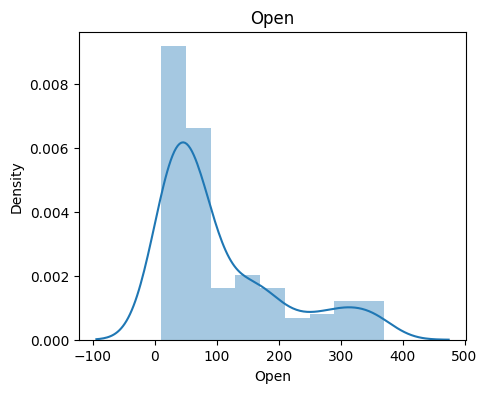

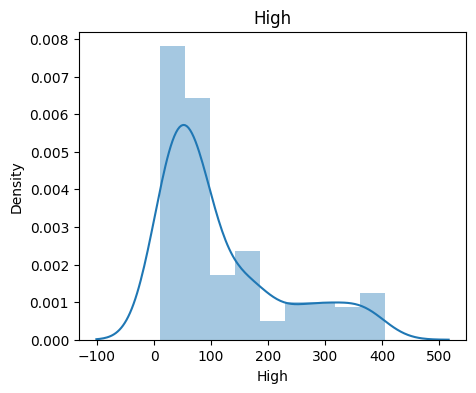

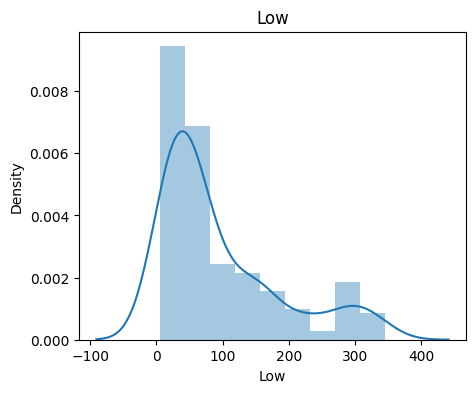

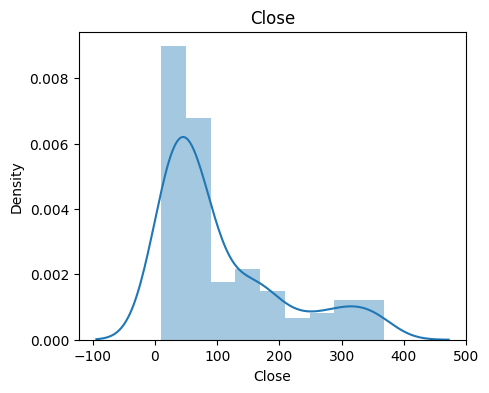

In [ ]:
#Chart - 6: plots for data distribution
df1=df.copy() # creating data frame copy

df1.set_index("Date",inplace=True) # set index of data frame


for col in df1.columns:
  plt.figure(figsize=(5,4)) # set figure size
  sns.distplot(df1[col])  #plot distplot
  plt.title(col)          # set up plot title


Since our data is skewed, so we will perform some transformations during regression analysis.

## **Chart - 7**

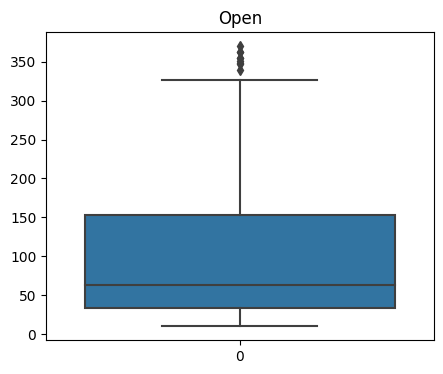

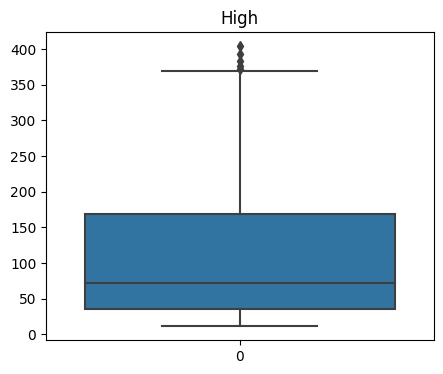

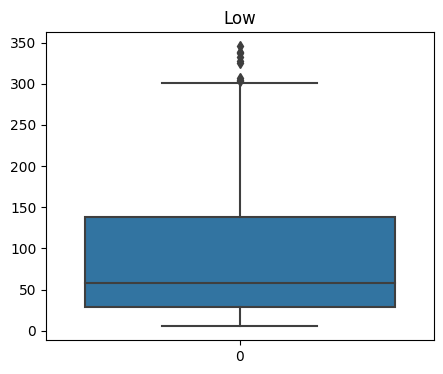

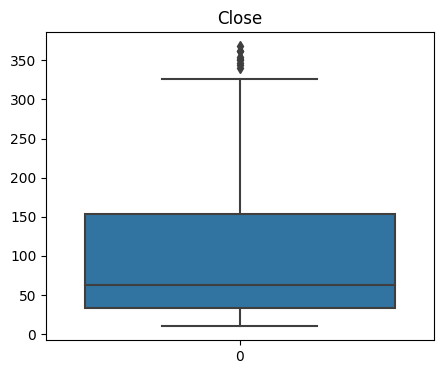

In [ ]:
# Chart- 7: checking the outlier in Dataset with the help of box whisker plot
for col in df1.columns:
  plt.figure(figsize=(5,4)) # set figure size
  sns.boxplot(df1[col])  # plot box plot
  plt.title(col)         # set up plot title


*  Above plot shows that there are some outliers in our dataset.
*  To handle outliers, various approaches can be employed, such as removing them from the dataset, transforming the data using robust statistical techniques, or imputing them with more representative values. The choice of the method depends on the nature of the data and the specific requirements of the analysis.

## **Chart -8**

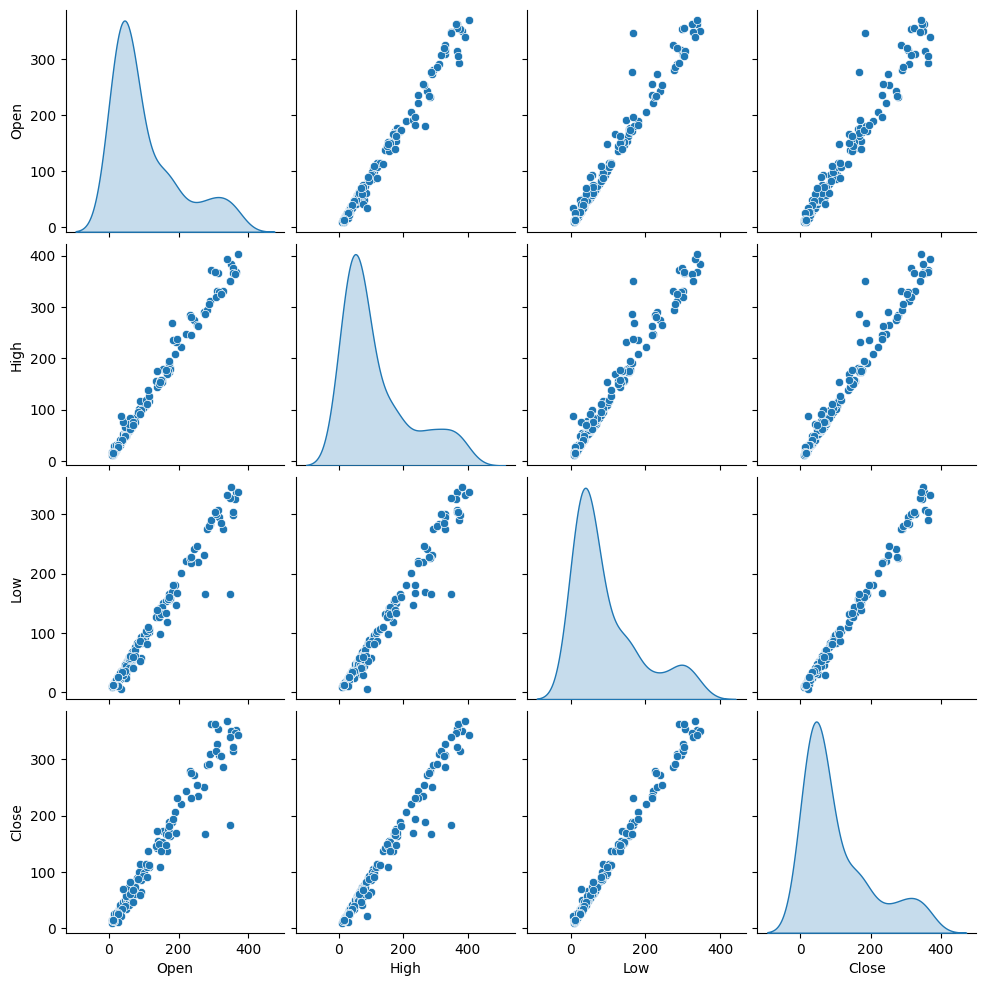

In [ ]:
# Chart - 8: Visualizing the pair plot
sns.pairplot(df,diag_kind='kde')  #plot pair plot
plt.show()                        # Display figure

*  A pair plot graph is used for analyzing the Yes Bank stock price because it helps explore relationships, detect patterns and trends, and identify outliers..
It allows for correlation analysis and understanding of data distributions.
*  Above graph shows that our data is not normally distributed. So,We will
transform the data to bring it into a normal distribution.

## **Chart - 9**

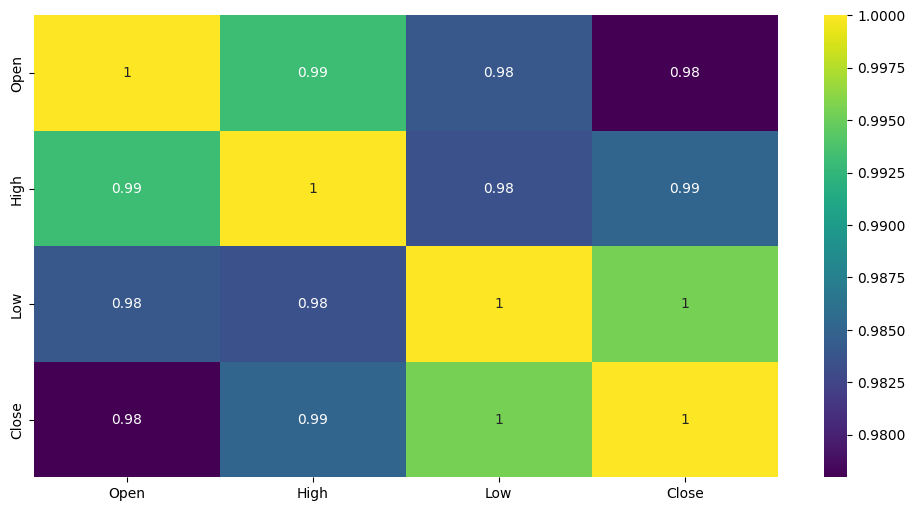

In [ ]:
# Chart - 9: Our first step to check multicollinearity

plt.figure(figsize=(12,6))                                #setup figure size
sns.heatmap(df.corr(), annot = True, cmap='viridis')      #plot heat map
plt.show()                                                # display figure

*  From the above plot,it is very significant that there is high collinearity.Each and every feature is correlated with every other feature.(i.e. Multicollinearity)
*  
The gained insights are useful to understand and get an idea about the collinearity of the features so that we could deal with it in future model implentation.

# **5. Feature Engineering and Data Preprocessing**

## **Feature Engineering on 'Date' column**

In [ ]:
#copying data to preserve orignal file
data = df.copy()

In [ ]:
# convert string object to datetime object
date_series = data['Date']
date_format = '%b-%y'  # Example format (YYYY-MM-DD)
data['Date'] = date_series.apply(lambda x: datetime.strptime(x, date_format))


In [ ]:
#set date as index
data.set_index('Date',inplace=True)

In [ ]:
#check if changes are being reflected
data

,Open,High,Low,Close
Date,,,,
2005-07-01,13.00,14.00,11.25,12.46
2005-08-01,12.58,14.88,12.55,13.42
2005-09-01,13.48,14.87,12.27,13.30
2005-10-01,13.20,14.47,12.40,12.99
2005-11-01,13.35,13.88,12.88,13.41
...,...,...,...,...
2020-07-01,25.60,28.30,11.10,11.95
2020-08-01,12.00,17.16,11.85,14.37
2020-09-01,14.30,15.34,12.75,13.15


## **Check and Remove the Multi-Collinearity Problem**

In [ ]:
#Multicollinearity Check by VIF method

from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
calc_vif(data[[i for i in data.describe().columns if i not in ['Close']]])

,variables,VIF
0,Open,175.185704
1,High,167.057523
2,Low,71.574137


In [ ]:
# We add a column Average_Price in the dataset
# Calculate the average price
data['Average_Price'] = round((data['Open'] + data['High'] + data['Low']) / 3, 2)

# Change the Column order

data = data.iloc[:, [0,1,2,4,3]]

#Show the dataframe
data

,Open,High,Low,Average_Price,Close
Date,,,,,
2005-07-01,13.00,14.00,11.25,12.75,12.46
2005-08-01,12.58,14.88,12.55,13.34,13.42
2005-09-01,13.48,14.87,12.27,13.54,13.30
2005-10-01,13.20,14.47,12.40,13.36,12.99
2005-11-01,13.35,13.88,12.88,13.37,13.41
...,...,...,...,...,...
2020-07-01,25.60,28.30,11.10,21.67,11.95
2020-08-01,12.00,17.16,11.85,13.67,14.37
2020-09-01,14.30,15.34,12.75,14.13,13.15


The high multi collinearity problem between the independent variables has been replaced by Average Price of the three independent variables.

## **Data Manipulation**

In [ ]:
#applying log tranform
transformed_df = np.log(data)

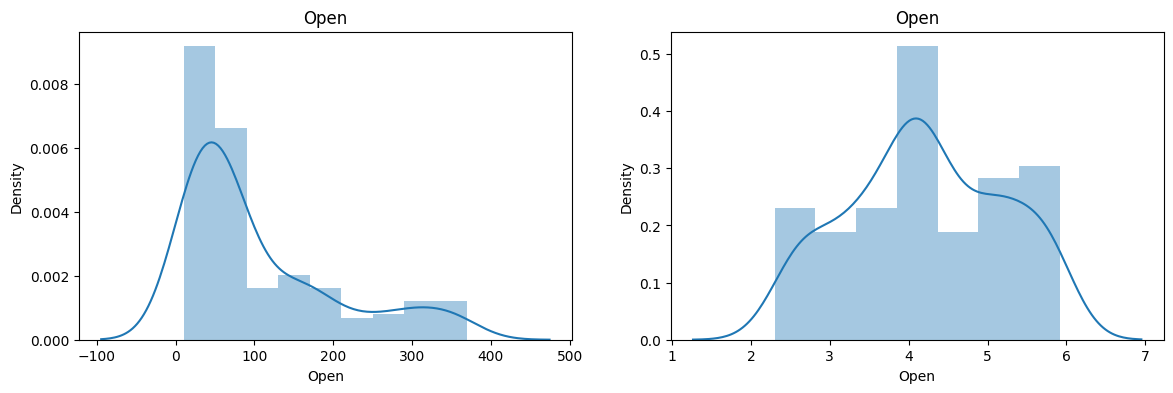

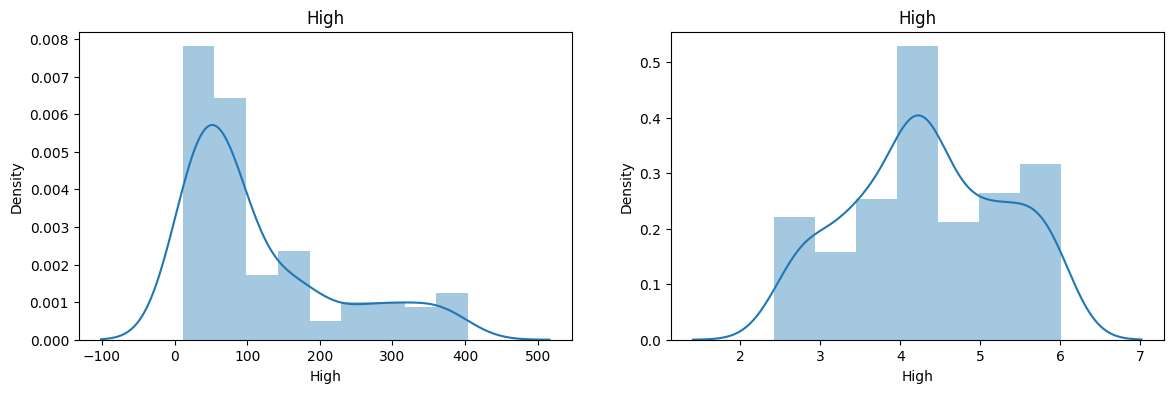

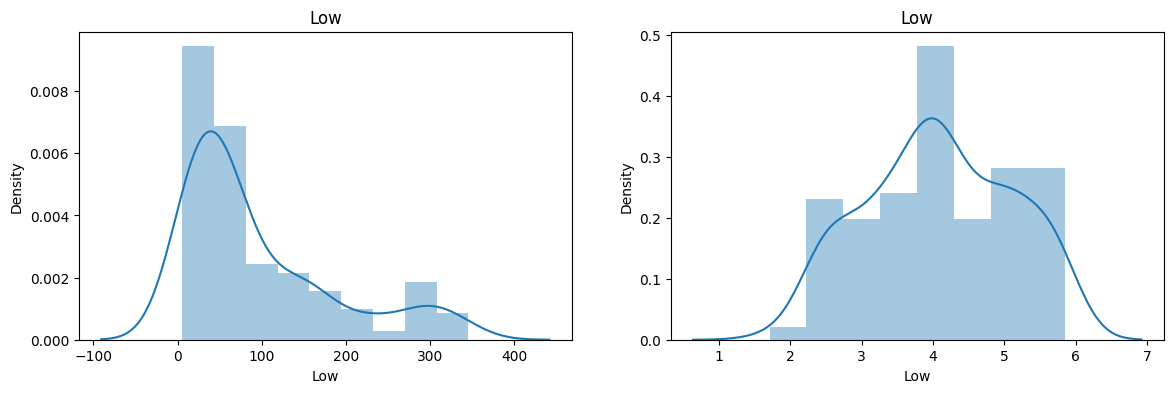

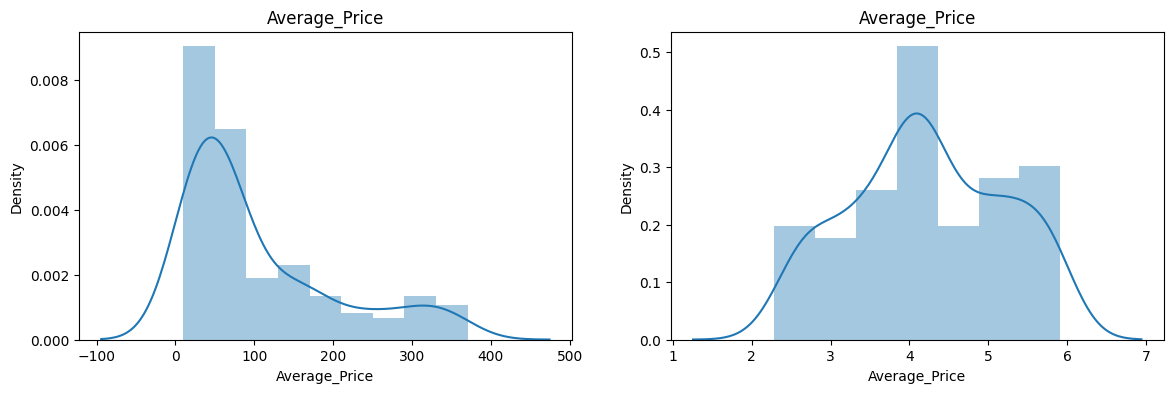

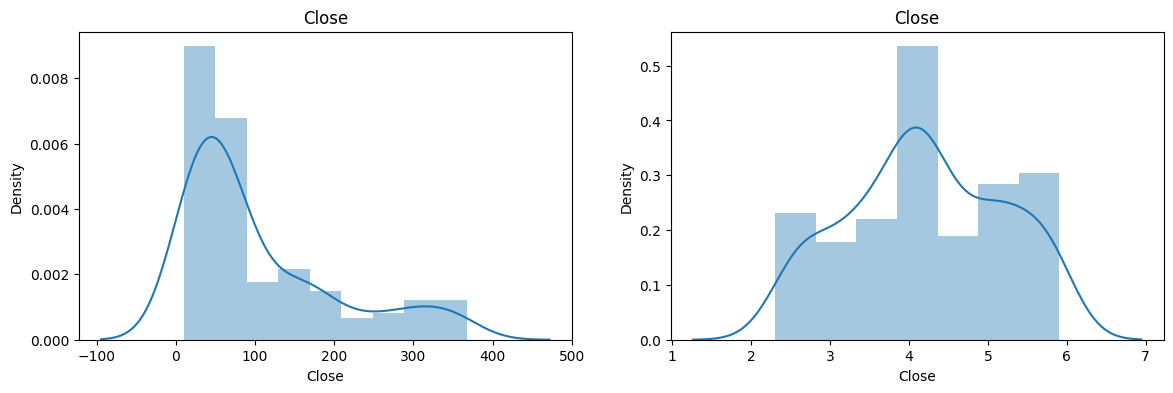

In [ ]:
#plots for dependent variable before and after doing tranformation
transformed_df = pd.DataFrame(transformed_df,columns=data.columns)

for col in transformed_df.columns:
    plt.figure(figsize=(14,4)) # setup figure size

    plt.subplot(1,2,1)         #plot first subplot
    sns.distplot(data[col])    #plot dist plot

    plt.title(col)             #set up plot title



    plt.subplot(1,2,2)                   #plot second subplot

    sns.distplot(transformed_df[col])    #plot distplot

    plt.title(col)                       # set up plot title

    plt.show()                           #display figure

## **Changing Data Type**

In [ ]:
#convert dtype float to integer

data= data.iloc[:,:6].astype(int)

In [ ]:
#check if changes are being reflected
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 185 entries, 2005-07-01 to 2020-11-01
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Open           185 non-null    int64
 1   High           185 non-null    int64
 2   Low            185 non-null    int64
 3   Average_Price  185 non-null    int64
 4   Close          185 non-null    int64
dtypes: int64(5)
memory usage: 8.7 KB


## **Data Splitting**

In [ ]:
# Selecting the independent variables
features = ['Open','Low', 'High', 'Average_Price']

In [ ]:
# Separating the X variables
X = data[features]

In [ ]:
# Separating the dependent variables
Y = data['Close']

In [ ]:
#Train/Test/Split

X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.2,
                                                random_state=42)
print(X_train.shape,X_test.shape)

print(Y_train.shape , Y_test.shape)

(148, 4) (37, 4)
(148,) (37,)


#**Let's start**

#**Building Model**

## **ML Model - 2: Ridge Regression**

### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# ML Model -2: Ridge Regression

# We already have the column transformer
#trf1 = ColumnTransformer([('scale',MinMaxScaler(),slice(0,5))])

#Implement Ridge Regression
trf4 = Ridge()

In [ ]:
# Create the pipeline for ridge regression
ridge  = make_pipeline(trf1,trf4)

In [ ]:
# Fit the training datasets into the ridge pipeline
ridge.fit(X_train, Y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('scale', MinMaxScaler(),
                                                  slice(0, 5, None))])),
                ('ridge', Ridge())])

In [ ]:
#make predictions
ridge_pred = ridge.predict(X_test)

In [ ]:
# check train and test accuracy
ridge_train_accuracy = round(ridge.score(X_train,Y_train), 4)
ridge_test_accuracy = round(ridge.score(X_test,Y_test), 4)
ridge_cross_val= round(cross_val_score(ridge,X_train,Y_train,cv=10).mean(), 4)

In [ ]:
# print train and test accuracy
print("Train accuracy:", ridge_train_accuracy)
print("Test accuracy:", ridge_test_accuracy)
print("Cross val accuracy:", ridge_cross_val)

Train accuracy: 0.9853
Test accuracy: 0.9804
Cross val accuracy: 0.9811


In [ ]:
# Evaluate the metrics

ridge_MAE = round(mean_absolute_error(Y_test, ridge_pred), 4)
print("MAE :" , ridge_MAE)

ridge_MSE  = round(mean_squared_error(Y_test, ridge_pred), 4)
print("MSE :" , ridge_MSE)

ridge_RMSE = round(np.sqrt(MSE), 4)
print("RMSE :" ,ridge_RMSE)

ridge_r2 = round(r2_score(Y_test, ridge_pred), 4)
print("R2 :" ,ridge_r2)

ridge_Adjusted_r2 = round(1-(1-r2_score(Y_test, ridge_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)), 4)
print("Adjusted R2 : ",ridge_Adjusted_r2)

MAE : 7.4391
MSE : 177.488
RMSE : 10.6243
R2 : 0.9804
Adjusted R2 :  0.9779


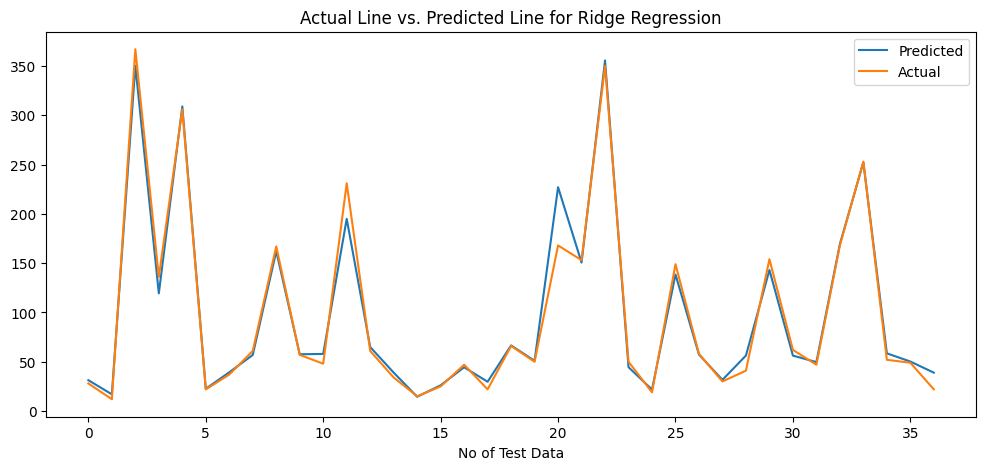

In [ ]:
# Visualizing evaluation Metric Score chart

plt.figure(figsize=(12,5)) # Set up figurer size
plt.plot(ridge_pred)  # Plot the predicted values from ridge
plt.plot(np.array(Y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data') #set x-axis lable
plt.title('Actual Line vs. Predicted Line for Ridge Regression') # set plot title
plt.show()  # display figure

### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# Create a pipeline with preprocessing and the model
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),  # Min-Max scaling
    ('poly_features', PolynomialFeatures()),  # Polynomial features
    ('model', Ridge())  # Ridge regression model
])

In [ ]:
# Defining Hyperparameter Grid
Param_grid = {

    'poly_features__degree': [2, 3, 4, 5, 6, 8],  # Degree of polynomial features
    'scaler__feature_range': [(0, 1), (0, 2)],  # MinMaxScaler's feature_range
    'model__alpha':[1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100, 1000, 10000],#  regularization strength

}

In [ ]:
#Perform Hyperparameter Tuning with GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid=Param_grid,  scoring='neg_mean_squared_error', cv= 5)
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('poly_features', PolynomialFeatures()),
                                       ('model', Ridge())]),
             param_grid={'model__alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05,
                                          0.0001, 0.001, 0.01, 0.1, 1, 5, 10,
                                          20, 30, 40, 45, 50, 55, 60, 100, 1000,
                                          10000],
                         'poly_features__degree': [2, 3, 4, 5, 6, 8],
                         'scaler__feature_range': [(0, 1), (0, 2)]},
             scoring='neg_mean_squared_error')

In [ ]:
#Print the Best Hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'model__alpha': 0.0001, 'poly_features__degree': 5, 'scaler__feature_range': (0, 2)}


In [ ]:
#select best model
best_model = grid_search.best_estimator_

In [ ]:
# make predictions
Ridg_pred = best_model.predict(X_test)

In [ ]:
# check train and test accuracy
Ridge_train_accuracy = round(best_model.score(X_train,Y_train), 4)
Ridge_test_accuracy = round(best_model.score(X_test,Y_test), 4)
Ridge_cross_val= round(cross_val_score(best_model,X_train,Y_train,cv=10).mean(), 4)

In [ ]:
#print train and test accuracy score
print('train_accuracy',Ridge_train_accuracy)
print('test_accuracy',Ridge_test_accuracy)
print('cross_val',Ridge_cross_val)

train_accuracy 0.999
test_accuracy 0.9851
cross_val 0.9355


In [ ]:
# evaluate the metrics

Ridge_MAE = round(mean_absolute_error(Y_test,Ridg_pred), 4)
print("MAE :" ,Ridge_MAE)

Ridge_MSE  = round(mean_squared_error(Y_test,Ridg_pred), 4)
print("MSE :" , Ridge_MSE)

Ridge_RMSE = round(np.sqrt(Ridge_MSE), 4)
print("RMSE :" ,Ridge_RMSE)

Ridge_R2_score = round(r2_score(Y_test,Ridg_pred), 4)
print('R2_score:',Ridge_R2_score)

Ridge_Adj_r2 = round(1-(1-r2_score(Y_test, Ridg_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)), 4)
print("Adjusted R2 : ", Ridge_Adj_r2)

MAE : 6.4323
MSE : 134.5687
RMSE : 11.6004
R2_score: 0.9851
Adjusted R2 :  0.9833


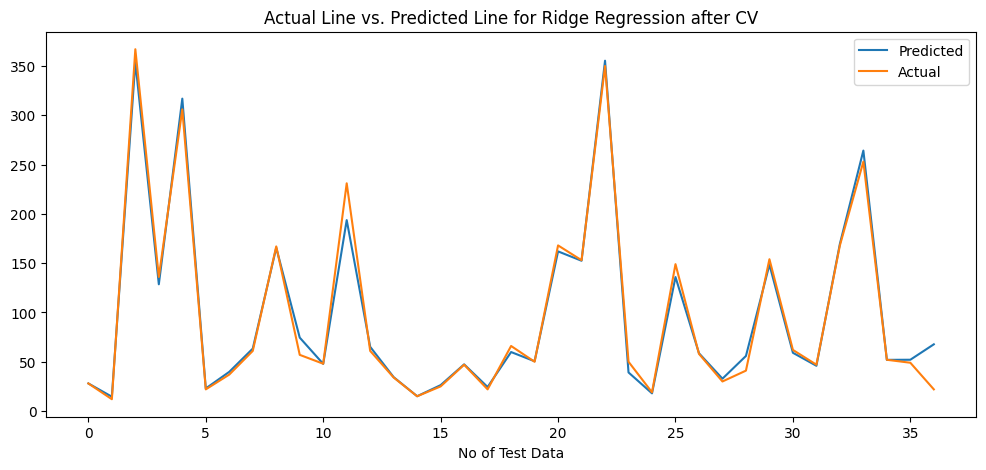

In [ ]:
# Actual-Predicted values plot

plt.figure(figsize=(12,5))  #set figure size
plt.plot(Ridg_pred)           # plot predicted value
plt.plot(np.array(Y_test))  #plot actual value
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')  # set X-axis lable
plt.title('Actual Line vs. Predicted Line for Ridge Regression after CV') # set plot title
plt.show()                                  # figure display

### 3. What can you say about the model's performance?

After cross-validation, the Ridge regression model improved in terms of its evaluation metrics. The post-cross-validation Ridge regression model showed a decrease in Mean Absolute Error (MAE) from 7.4496 to 6.2734, a decrease in Mean Squared Error (MSE) from 177.5783 to 122.2454, and a increase in Root Mean Squared Error (RMSE) from 10.4189 to 11.0565. Additionally, the R-squared (R2) score increased from 0.9804 to 0.9865, and the Adjusted R-squared score increased from 0.9779 to 0.9848.

In conclusion, the Ridge regression model demonstrated improved performance in terms of lower errors and higher goodness-of-fit (R2 and Adjusted R2) after cross-validation, indicating that the model generalizes better and is likely more robust in making predictions on new data.